# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2024-03-28

## Get started with map-making using open-sources tools

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing the following libraries:

In [1]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm

### Search for a point of interest

You can use the `pyrosm` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the United Tribes
Technical College campus in North Dakota. The address in here,
`'United Tribes Technical College, Bismarck, ND, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down. We are also specifying that we want it to be tagges as a
`'amentity'` type, specifically a `'college'` You might have to try a
couple different searches with different addresses and/or tags to get
the address you want, just like if you are using a map website or app.

In [3]:
# Search for Metropolitan State University of Denver
msud_gdf = osm.features_from_address(
    'Auraria campus, Denver, CO',
    {'amenity': ['university']})
msud_gdf

alt_name     amenity designation  \
element_type osmid                                                
node         2155391509      MSU Denver  university  University   
             4131746182             NaN  university         NaN   
             5336796189             NaN  university         NaN   
way          50807585    Auraria Campus  university         NaN   

                                                             name  \
element_type osmid                                                  
node         2155391509   Metropolitan State University of Denver   
             4131746182  Facility For Advanced Spatial Technology   
             5336796189                 University of the Rockies   
way          50807585               University of Colorado Denver   

                                                     old_name source  \
element_type osmid                                                     
node         2155391509  Metropolitan State College of Denver   Bing   
             4131746182                                   NaN    NaN   
             5336796189                                   NaN    NaN   
way          50807585                                     NaN    NaN   

                         wikidata  \
element_type osmid                  
node         2155391509   Q613736   
             4131746182       NaN   
             5336796189       NaN   
way          50807585    Q4822139   

                                                                  geometry  \
element_type osmid                                                           
node         2155391509                        POINT (-105.00434 39.74346)   
             4131746182                        POINT (-105.00230 39.74573)   
             5336796189                        POINT (-104.99685 39.74918)   
way          50807585    POLYGON ((-105.00159 39.74649, -105.00138 39.7...   

                        addr:city addr:housenumber  ... wheelchair addr:unit  \
element_type osmid                                  ...                        
node         2155391509       NaN              NaN  ...        NaN       NaN   
             4131746182    Denver             1200  ...    limited       NaN   
             5336796189    Denver             1201  ...        NaN       200   
way          50807585      Denver             1380  ...    limited       NaN   

                                                                     nodes  \
element_type osmid                                                           
node         2155391509                                                NaN   
             4131746182                                                NaN   
             5336796189                                                NaN   
way          50807585    [647873186, 3273383408, 647873193, 5604640969,...   

                          ele gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                          
node         2155391509   NaN            NaN          NaN             NaN   
             4131746182   NaN            NaN          NaN             NaN   
             5336796189   NaN            NaN          NaN             NaN   
way          50807585    1584            031   05/30/2006         2088849   

                        gnis:state_id                        name:en  \
element_type osmid                                                     
node         2155391509           NaN                            NaN   
             4131746182           NaN                            NaN   
             5336796189           NaN                            NaN   
way          50807585              08  University of Colorado Denver   

                                       name:tr  
element_type osmid                              
node         2155391509                    NaN  
             4131746182                    NaN  
             5336796189                    NaN

In [9]:
aurariacampus_gdf=msud_gdf[msud_gdf.alt_name == "Auraria Campus"]

<Axes: >

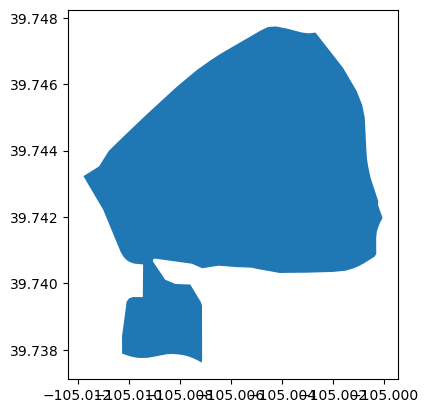

In [10]:
aurariacampus_gdf.plot()

We have a map of the UTTC Campus!

> **Warning**
>
> The Open Street Maps (OSM) database is not always complete. For
> example, try searching for UTTC with the `{'building': True}`, and
> compare it to the [map of the UTTC campus on their
> website](https://uttc.edu/wp-content/uploads/2022/12/CAMPUS-MAP-2022-23.pdf).
> What do you notice?

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [11]:
# Plot UTTC boundary
msud_map = aurariacampus_gdf.hvplot(
    # Givethe map a descriptive title
    title="Auraria Campus, Denver, CO",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(msud_map, 'uttc.html')

# Display the map
msud_map

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]